In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/shopee-product-matching/'
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [ ]:
train = pd.read_csv(DATA_PATH + 'train.csv')
train['image'] = DATA_PATH + 'train_images/' + train['image']
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,/content/drive/MyDrive/shopee-product-matching...,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,/content/drive/MyDrive/shopee-product-matching...,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,/content/drive/MyDrive/shopee-product-matching...,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,/content/drive/MyDrive/shopee-product-matching...,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,/content/drive/MyDrive/shopee-product-matching...,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [ ]:
tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
train['target'] = train.label_group.map(tmp)
train.head()

,posting_id,image,image_phash,title,label_group,target
0,train_129225211,/content/drive/MyDrive/shopee-product-matching...,94974f937d4c2433,Paper Bag Victoria Secret,249114794,"[train_129225211, train_2278313361]"
1,train_3386243561,/content/drive/MyDrive/shopee-product-matching...,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,"[train_3386243561, train_3423213080]"
2,train_2288590299,/content/drive/MyDrive/shopee-product-matching...,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,"[train_2288590299, train_3803689425]"
3,train_2406599165,/content/drive/MyDrive/shopee-product-matching...,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,"[train_2406599165, train_3342059966]"
4,train_3369186413,/content/drive/MyDrive/shopee-product-matching...,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,"[train_3369186413, train_921438619]"


In [ ]:
train_label = train.groupby('label_group').posting_id.count().sort_values(ascending=False)
train_label[:50]

label_group
1163569239    51
159351600     51
994676122     51
3113678103    51
3627744656    51
1141798720    51
562358068     51
3206118280    49
1733221456    46
1166650192    46
1091404026    45
3489985175    41
1237550763    37
1746655739    36
452508504     35
731330024     35
2008989859    35
4184214313    35
1575763518    34
871679006     34
66247839      34
3001123709    33
2259957740    33
952183003     33
2999794436    32
2935813666    32
3926100920    32
656698835     31
1226500780    31
997220911     30
1201602115    27
821583868     26
3868183614    25
3717044186    25
3326267479    24
1135976474    24
3040690230    23
2156459496    23
1306578136    23
927285629     23
1569494229    22
418991059     22
777596345     22
3441184770    22
2123332638    22
4141124289    22
2956941947    21
2911646536    21
1744240905    21
1544174053    21
Name: posting_id, dtype: int64

In [ ]:
pd.cut(train_label, bins=[0, 10, 20, 30, 40, 51]).value_counts()

(0, 10]     10781
(10, 20]      181
(20, 30]       23
(30, 40]       17
(40, 51]       12
Name: posting_id, dtype: int64

In [ ]:
def findByLabel(label_group_idx, figscale=2):
    train_a = train[train.label_group == label_group_idx].reset_index()
    count = len(train_a)
    showImgNumber = count
    if count > 5:
        col = 5
        row = int(np.ceil(count/col))  
    else:
        row = 1
        col = count
    fig, ax = plt.subplots(row, col, figsize=(col*figscale, row*figscale))
    
    if row == 1:
        for j in range(col):
            if showImgNumber == 0: break
            ax[j].imshow(cv2.imread(train_a.image[showImgNumber-1]))
            ax[j].set_xticks([])
            ax[j].set_yticks([])
            showImgNumber-=1
    else:
        for i in range(row):
            for j in range(col):
                if showImgNumber == 0: break
                ax[i, j].imshow(cv2.imread(train_a.image[showImgNumber-1]))
                ax[i, j].set_xticks([])
                ax[i, j].set_yticks([])
                
                showImgNumber-=1
    fig.text(0.1, 0.95, 'label_group: {}'.format(label_group_idx))
    return train_a

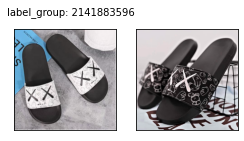

In [ ]:
findByLabel(2141883596)
plt.show()

In [ ]:
train.groupby('image_phash').posting_id.count().sort_values(ascending=False)

image_phash
fad28daa2ad05595    26
d0c0ea37bd9acce0    20
be12e12f9ec1e198    17
e992966d4ba49761    16
f6d98134b904b56b    16
                    ..
b996c6cb9b82c266     1
b996c6c5ce61c638     1
b996c69992c7d330     1
b996c669962dc986     1
fffa9a21e185c094     1
Name: posting_id, Length: 28735, dtype: int64

In [ ]:
train[train.image_phash == 'd0c0ea37bd9acce0'].label_group.unique()

array([4198148727, 2403374241, 1960893869])

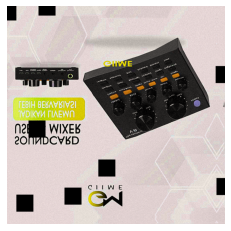

In [35]:
import cv2 as cv
import numpy as np
import albumentations  
import matplotlib.pyplot as plt
 
image = '/content/drive/MyDrive/shopee-product-matching/train_images/032c4e7aa98da4b86070984e3d23229f.jpg'
 
def imread(image):
    image = cv.imread(image)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #功能：函数cvCvtColor实现色彩空间转换
    image = image.astype(np.uint8)
    return np.array(image)
 
def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()


trans =  A.Compose(
    [
        A.RandomBrightness(limit=1.5, p=0.5),
        A.Rotate(limit=89, p=0.5),
        A.RGBShift(r_shift_limit=133, g_shift_limit=146, b_shift_limit=26, p=0.3),
        

        # A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.3),
        A.OneOf([
            A.HorizontalFlip(p = 0.5),
            A.VerticalFlip(p=0.5),
            A.RandomRotate90(p = 0.5),
        ], p=0.8),
        A.OneOf([
            A.MotionBlur(p=0.5),
            A.MedianBlur(blur_limit=3, p=0.5),
            A.Blur(blur_limit=3, p=0.5),
        ], p=0.8),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.5),
            A.GridDistortion(p=0.5),
            A.IAAPiecewiseAffine(p=0.5),
        ], p=0.8),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),
        ], p=0.5),
        A.HueSaturationValue(p=0.5),
        A.Cutout(num_holes=8, max_h_size=80, max_w_size=80, p = 0.6),
    ])

a = imread(image)

for i in range(1):
    img = trans(image=a)['image']
    show(img)

# show(image2)
# show(image3)
# show(image4)
# show(image5)
# show(image6)


In [6]:
import albumentations as A
from PIL import Image
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

def imread(image):
    image = cv.imread(image)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #功能：函数cvCvtColor实现色彩空间转换
    image = image.astype(np.uint8)
    return np.array(image)
 
trans =  A.Compose(
    [
        A.HorizontalFlip(p = 0.5),
        # A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.3),
        A.OneOf([
            A.MotionBlur(p=0.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.5),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=0.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.5),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),
        ], p=0.5),
        A.HueSaturationValue(p=0.3),
    ])

image = '/content/drive/MyDrive/shopee-product-matching/train_images/032c4e7aa98da4b86070984e3d23229f.jpg'
a = imread(image)
img = trans(image=a)['image']
 
cv.imshow("da", img)
cv.waitKey(0)

DisabledFunctionError: ignored